# 1a VERIFICAÇÃO DE APRENDIZAGEM

In [ ]:
import unicodedata
import re
import pandas as pd
import numpy as np

In [ ]:
# Converts the unicode file to ascii
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                   if unicodedata.category(c) != 'Mn')


def preprocess_sentence(w):
    w = w.strip().lower()

    # creating a space between a word and the punctuation following it eg: "he is a boy." => "he is a boy ."
    # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping
    # -punctuation
    w = re.sub(r"([?.!,¿#@0-9])", r"", w)

    return w

### Seleção Dos Dados

No experimento realizado foi usado um conjunto de dados contento versículos extraídos da Bíblia em 27 versões diferentes cada uma em um idioma.
São 26 idiomas indígenas e uma versão em Português (versão internacional).
Além disso, apenas uma porção do conjunto de dados original foi utilizada. 
Isso ocorreu devido ao alto consumo de recurso computacional que inviabilizariam uma avaliação do método o proposto. 
Os algoritmos consomem um quantidade considerável de recurso computacional muitos dados impossibilitam a execução adequada dos experimentos.

In [ ]:
!wget

In [1]:
pd.read_csv('target_aligned_text.csv').sample(frac=0.01).to_csv('samples.csv',
index=False, index_label=False)
samples = pd.read_csv("samples.csv")

NameError: name 'pd' is not defined

In [2]:
s = samples[samples['LANG']=="Portuguese"].sample(n=5)
s['TEXT'].to_numpy()

NameError: name 'samples' is not defined

In [3]:
s = s['TEXT'].apply(preprocess_sentence).to_numpy()
s

NameError: name 's' is not defined

### Carregando Corpus Selecionado

### PRÉ-PROCESSAMENTO

1. Ao menos um método de pré-processamento deve ser usado, gerando uma nova base de
dados.
2. O tipo de pré-processamento utilizado deve estar relacionado ao contexto da aplicação, de
acordo com a modelagem do problema indicada na resolução da Atividade 4 (ML-L04).
3. Remoção de vírgulas, espaços em branco, identificador dos padrões, etc. não serão
considerados pré-processamento válidos.

In [ ]:
samples = pd.read_csv('samples.csv')
classes = set(samples["LANG"].tolist())

KeyError: 'Lang'

In [ ]:
from collections import Counter
X = samples['TEXT'].apply(preprocess_sentence).to_numpy()
y = samples['LANG'].to_numpy()

metadata = pd.DataFrame.from_dict(Counter(y), orient='index')
metadata

,0
Guarani,20
kayapó,25
Sateré-Mawé,13
Apurinã,17
Kaiwá,16
Apinayé,17
Maxakalí,27
Terena,16
Guajajara,20
Paumarí,21


#### Método

O pré-processamento transforma cada documento em um formato que posso ser utilizado no cluster. A primeira fase do processamento consiste em transforma cada cluster em um vetor com M-dimensões. 
Nesse vetor, cada elemento é o vetor que representa uma única palavra que também é um vetor.
Para fazer isso é possível utilizar o *Term Frequency and Inverse Term Frequency*.




#### TF-IDF Weighing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2, 3))
X_transformed = tfidf.fit_transform(X)
X_transformed.shape

(486, 12626)

### Avaliação do Algoritmo

### Métricas 

#### Davies-Bouldin score

É uma métrica que avaliação da média de similaridade um cluster com outro mais similar. 
Ela considera as distâncias dentro de cada cluster e entre cada um dos clusteres. Valores menores indicam clusters melhores.



#### Silhouette Coefficient of all samples

Essa métrica considera a distância entre cada exemplo dentro de cada cluster e entre o cluster mais próximo. O melhor valor é 1, 0 significa a existência de overlaps e -1 significa o pior resultado possível. 

*Referências:* 

[1. A Cluster Separation Measure](https://ieeexplore.ieee.org/document/4766909)

[2. Silhouettes: A graphical aid to the interpretation and validation of 
cluster analysis](https://www.sciencedirect.com/science/article/pii/0377042787901257)

[3. A Dendrite Method for Cluster Analysis
](https://www.researchgate.net/publication/233096619_A_Dendrite_Method_for_Cluster_Analysis)

## K-Means 


*Referência:* [Opinion classification using Maximum Entropy and K-Means Clustering](https://ieeexplore.ieee.org/abstract/document/7910292?casa_token=QAbNYBdCmAoAAAAA:xA-elSpmLadbWey9C2yAhyHzH2FO4fRA9S1ys0Y49b16Fx00jcuhhXUx9bNaK_oAyyighNFuGA)



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
kmeans = KMeans(n_clusters=len(classes), random_state=42).fit(X_transformed)
pred = kmeans.predict(X_transformed)

silhouette = silhouette_score(X_transformed.toarray(), pred)

davies_boul = davies_bouldin_score(X_transformed.toarray(), pred)

print("silhouette_score: ", silhouette)
print("davies_boul: ", davies_boul)

NameError: name 'classes' is not defined

In [ ]:
silh_scores = []
db_scores = []
test_range = list(range(2, 31))
for n_ in test_range:
  kmeans = KMeans(n_clusters=n_, random_state=42).fit(X_transformed)
  silh_score = silhouette_score(X_transformed.toarray(), kmeans.labels_)
  davies_boul = davies_bouldin_score(X_transformed.toarray(), kmeans.labels_)
  silh_scores.append(silh_score)
  db_scores.append(davies_boul)

In [ ]:
evaluation_data = pd.DataFrame({
    "n_clusters":test_range+test_range,
    "scores":silh_scores+db_scores,
    "metric": ["silhouette_score"]*len(test_range)+["davies_boul"]*len(test_range),
})
evaluation_data.sample(n=5)

,n_clusters,scores,metric
3,5,0.057299,silhouette_score
28,30,0.172080,silhouette_score
39,12,2.878463,davies_boul
42,15,2.688358,davies_boul
12,14,0.128682,silhouette_score


Text(0.5, 1.0, 'Evolução dos Modelos')

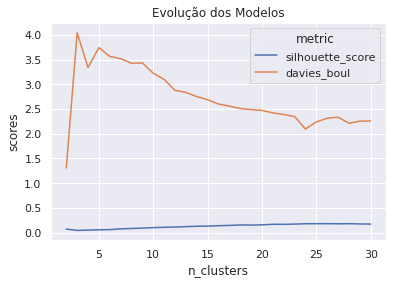

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
g = sns.lineplot(x="n_clusters", y="scores", hue="metric", 
             data=evaluation_data)
g.set_title('Evolução dos Modelos')

### Análise Usando TSNE

Em análise preliminar, pode-se ver na figura a disposição dos idiomas em uma projeção 2D. 
Foi utilizado *t-distributed Stochastic Neighbor Embedding* (TSNE) para a redução da dimensionalidade e uma visualização dos dados.
Essa é uma forma bastante popular para visualização de dados em alta-dimensionalidade.
Nessa técnica os objetos são distribuídos de tal forma que pares semelhantes tem uma alta probabilidade na distribuição.
O modelo é treinado para minimizar a divergência em Kullback-Leibler *van2014accelerating*.
Após a redução da dimensionalidade das originais 18095 para apenas duas,  os dados foram postos em uma escala entre 0 e 1.

In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X_transformed)
X_embedded.shape

(486, 2)

In [ ]:
kmeans_2d = KMeans(n_clusters=len(classes), random_state=42).fit(X_embedded)

In [ ]:

pred = kmeans_2d.predict(X_embedded)

cluster_c = kmeans_2d.cluster_centers_

silhouette = silhouette_score(X_embedded, kmeans.labels_)

davies_boul = davies_bouldin_score(X_embedded, kmeans.labels_)

print("silhouette_score: ", silhouette)
print("davies_boul: ", davies_boul)

silhouette_score:  0.7780654
davies_boul:  0.30007718578064096


In [ ]:
to_label = lambda cluster_id: "cluster_"+str(cluster_id)

In [ ]:
clusters_ = pd.DataFrame(X_embedded, columns=['D1', 'D2'])
clusters_['knn_cluster'] = pred
clusters_['true_labels'] = y
clusters_.to_csv('clusters.csv')

### Membros de cada Cluster

Aqui podemos visualizar quais idiomas estão em cada um dos clusters formados.

In [ ]:
cluster_mem = {}
for cluster in range(len(classes)):
  members = clusters_.loc[clusters_['knn_cluster']==cluster, 'true_labels'].unique()
  cluster_mem[cluster] = members
df_cluster_mem = pd.DataFrame.from_dict(cluster_mem, orient='index')
df_cluster_mem.columns = ["membro1", "membro2"]
df_cluster_mem.to_csv("clusters_members.csv")
df_cluster_mem

,membro1,membro2
0,Parecis,None
1,Kaiwá,Guarani
2,Nadëb,None
3,Paumarí,None
4,Xavánte,None
5,kayapó,None
6,Tukano,None
7,Maxakalí,None
8,Nambikuára,None
9,Macushi,None


### Majority Wins

Para obtermos um mapeamento, consideramos que a classe que mais aparece em cada cluster é a classe daquele cluster em específico.

In [ ]:
prediction = {}
for cluster in clusters_['knn_cluster'].tolist():
  members = clusters_.loc[clusters_['knn_cluster']==cluster, 'true_labels'].tolist()
  prediction[cluster] = Counter(members).most_common(1)[0][0]
prediction = pd.DataFrame.from_dict(prediction, orient='index')
prediction.columns = ["predicted"]
prediction["center_d1"] = kmeans_2d.cluster_centers_[:,0]
prediction["center_d2"] = kmeans_2d.cluster_centers_[:,1]
prediction.to_csv("clusters_members.csv")
prediction

,predicted,center_d1,center_d2
26,Guarani,13.375306,2.676740
5,kayapó,-16.502819,-13.614918
13,Sateré-Mawé,-5.787060,11.485277
22,Apurinã,13.453645,-7.797940
1,Kaiwá,3.616448,-5.104047
25,Apinayé,-18.543097,11.307330
7,Maxakalí,12.756598,-21.793909
21,Terena,1.450201,23.190771
20,Guajajara,19.566441,16.644825
3,Paumarí,24.754751,-5.889537


### Visualização



### Cluster Centers

Dessa forma simples podemos visualizar aqui o centro de cada um dos clusters formados.

Text(0.5, 1.0, 'Cluster Centers')

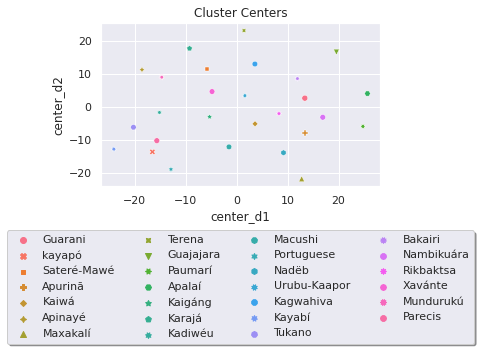

In [ ]:
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(5.,3)})
g = sns.scatterplot(data=prediction, x="center_d1", y="center_d2", hue="predicted", 
style="predicted")
g.legend(loc='lower center', bbox_to_anchor=(0.5, -1), ncol=4, fancybox=True, shadow=True)
g.set_title('Cluster Centers')

Text(0.5, 1.0, 'Cluster Kmeans')

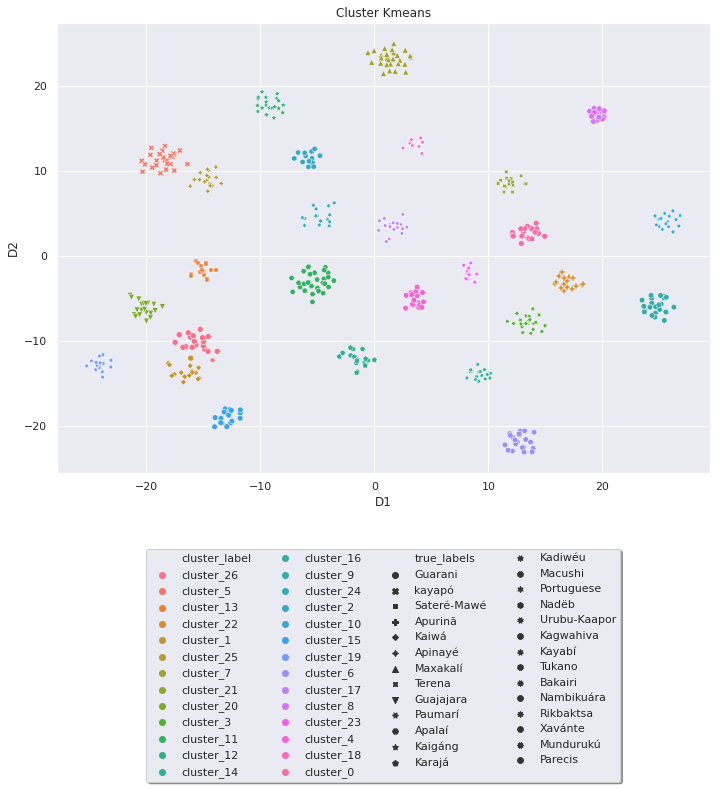

In [ ]:
import seaborn as sns
clusters_['cluster_label'] = clusters_['knn_cluster'].apply(to_label)
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.scatterplot(data=clusters_, x="D1", y="D2", hue="cluster_label", 
style="true_labels")
g.legend(loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=4, fancybox=True, shadow=True)
g.set_title('Cluster Kmeans')

In [ ]:
!mkdir snapshots/

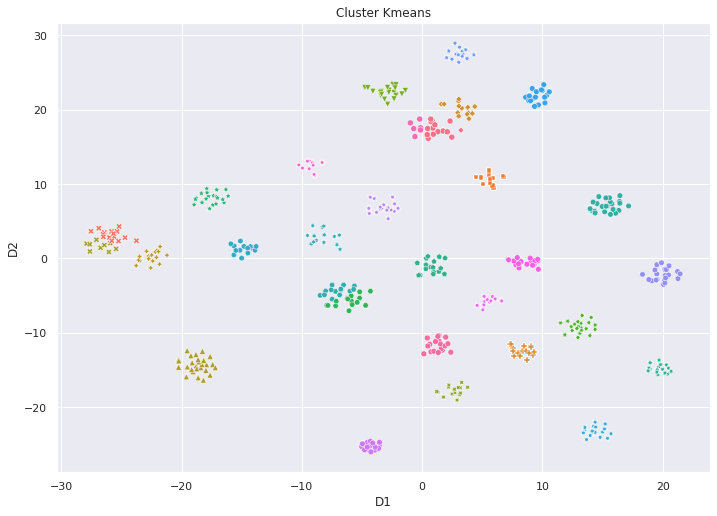

In [ ]:
import time 

fig = plt.figure()

silh_scores = []
db_scores = []
time_spend = []


for n_ in range(2, 31):
  start = time.time()

  kmeans = KMeans(n_clusters=n_, random_state=42).fit(X_embedded)
  time_spend.append((time.time()-start)/60)
  silh_score = silhouette_score(X_embedded, kmeans.labels_)
  davies_boul = davies_bouldin_score(X_embedded, kmeans.labels_)
  silh_scores.append(silh_score)
  db_scores.append(davies_boul)
  

  clus  = pd.DataFrame(X_embedded, columns=['D1', 'D2'])
  clus['knn_cluster'] = list(map(to_label, kmeans.predict(X_embedded)))
  clus['true_labels'] = y

  # Plota e salva o gráfico
  g = sns.scatterplot(data=clus, x="D1", y="D2", hue="knn_cluster", 
  style="true_labels")
  g.legend().remove()
  #g.legend(loc='lower center', bbox_to_anchor=(0.5, -0.9), ncol=4, fancybox=True, shadow=True)
  g.set_title('Cluster Kmeans')
  fig.savefig(f"snapshots/{n_}_snapshot.png")

In [ ]:
pd.DataFrame({
    "silh_scores":silh_scores,
    "db_scores":db_scores,
    "time_spend":time_spend
}).to_csv('snapshots.csv')

In [ ]:
get_seq = lambda file:int(file.split('_')[0])

data = zip(map(get_seq, os.listdir('snapshots')), os.listdir('snapshots'))
sorted_files = sorted_by_second = sorted(data, key=lambda tup: tup[0])

In [ ]:
import imageio
import os
images = []
for _, filename in sorted_files:
    print(filename)
    
    images.append(imageio.imread(os.path.join('snapshots', filename)))
imageio.mimsave('movie.gif', images, fps=0.09)

2_snapshot.png
3_snapshot.png
4_snapshot.png
5_snapshot.png
6_snapshot.png
7_snapshot.png
8_snapshot.png
9_snapshot.png
10_snapshot.png
11_snapshot.png
12_snapshot.png
13_snapshot.png
14_snapshot.png
15_snapshot.png
16_snapshot.png
17_snapshot.png
18_snapshot.png
19_snapshot.png
20_snapshot.png
21_snapshot.png
22_snapshot.png
23_snapshot.png
24_snapshot.png
25_snapshot.png
26_snapshot.png
27_snapshot.png
28_snapshot.png
29_snapshot.png
30_snapshot.png


In [ ]:
!zip -r snapshots.zip snapshots/

  adding: snapshots/ (stored 0%)
  adding: snapshots/9_snapshot.png (deflated 4%)
  adding: snapshots/11_snapshot.png (deflated 4%)
  adding: snapshots/8_snapshot.png (deflated 4%)
  adding: snapshots/15_snapshot.png (deflated 4%)
  adding: snapshots/2_snapshot.png (deflated 4%)
  adding: snapshots/5_snapshot.png (deflated 4%)
  adding: snapshots/3_snapshot.png (deflated 4%)
  adding: snapshots/6_snapshot.png (deflated 4%)
  adding: snapshots/13_snapshot.png (deflated 4%)
  adding: snapshots/24_snapshot.png (deflated 4%)
  adding: snapshots/10_snapshot.png (deflated 4%)
  adding: snapshots/16_snapshot.png (deflated 4%)
  adding: snapshots/14_snapshot.png (deflated 4%)
  adding: snapshots/12_snapshot.png (deflated 4%)
  adding: snapshots/30_snapshot.png (deflated 4%)
  adding: snapshots/4_snapshot.png (deflated 4%)
  adding: snapshots/20_snapshot.png (deflated 4%)
  adding: snapshots/22_snapshot.png (deflated 4%)
  adding: snapshots/17_snapshot.png (deflated 4%)
  adding: snapshots/26_s